In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
df = pd.read_csv('MES_DEFINITIVO.csv', low_memory=False)
df

,author,aut_scrname,tweet_id,retweeted_status,full_text,reply,created_at,retweet_count,favorite_count,hashtags,...,complete_text,prev,p,0,cap,universal,friend,temporal,user,network
0,ROBYUS,78_robyus,1198961837112475653,La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,RT @Rinaldi_euro: La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,NaN,2019-11-25 13:49:12,612,0,None,...,La riforma del Mes e una cagata pazzesca,1,1.000000,78_robyus,0.010165,0.170132,0.311763,0.460315,0.067460,0.129106
1,ROBYUS,78_robyus,1200291943944740866,A prescindere dal Vostro orientamento politico @GiorgiaMeloni ha dato voce a TUTTI\n\n#Meloni \n#StopMes\n#MES\n#Conte https://t.co/6Dmvg4C4IN,RT @flayawa: A prescindere dal Vostro orientamento politico @GiorgiaMeloni ha dato voce a TUTTI\n\n#Meloni \n#StopMes\n#MES\n#Conte https://t.co,NaN,2019-11-29 05:54:34,151,0,None,...,A prescindere dal Vostro orientamento politico GiorgiaMeloni ha dato voce a TUTTI Meloni StopMes MES Conte,1,0.971212,78_robyus,0.010165,0.170132,0.311763,0.460315,0.067460,0.129106
2,Antonia Agostini,antoniacri,1198962278047068162,Giorno 9\n#StopMes NO al #MES\n#StopMes No al #MES \n#StopMes NO al #MES \n#StopMes NO al #MES\n#StopMes NO al #MES \n#StopMes NO al #MES,RT @Nadezhda24Kr: Giorno 9\n#StopMes NO al #MES\n#StopMes No al #MES \n#StopMes NO al #MES \n#StopMes NO al #MES\n#StopMes NO al #MES \n#Stop,NaN,2019-11-25 13:50:57,1,0,None,...,Giorno 9 StopMes NO al MES StopMes No al MES StopMes NO al MES StopMes NO al MES StopMes NO al MES StopMes NO al MES,1,0.976877,antoniacri,0.005213,0.111167,0.178233,0.301336,0.212079,0.568829
3,Antonia Agostini,antoniacri,1199406183779618816,Bisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES,RT @Nadezhda24Kr: Bisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #,NaN,2019-11-26 19:14:52,2,0,None,...,Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES,1,0.993002,antoniacri,0.005213,0.111167,0.178233,0.301336,0.212079,0.568829
4,Antonia Agostini,antoniacri,1199487003877924865,giorno 10\nAnche oggi\n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes,RT @VedeleAngela: giorno 10\nAnche oggi\n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #,NaN,2019-11-27 00:36:01,18,0,None,...,giorno 10 Anche oggi StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes,1,0.976976,antoniacri,0.005213,0.111167,0.178233,0.301336,0.212079,0.568829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241495,Matteo Corrocher,CorrocherMatteo,1206344347345702917,"Quando un cialtrone sovranista dice che il #MES serve per salvare Deutsche Bank con i soldi italiani, ricordagli questa lista di banche nostrane e chiedigli quanto quota il CDS di DB rispetto alla piu grande banca italiana. Se ti risponde Bacioni, hai trovato il Capitano. https://t.co/zGoQRr4s6w","RT @carloalberto: Quando un cialtrone sovranista dice che il #MES serve per salvare Deutsche Bank con i soldi italiani, ricordagli questa",NaN,2019-12-15 22:44:39,172,0,None,...,Quando un cialtrone sovranista dice che il MES serve per salvare Deutsche Bank con i soldi italiani ricordagli questa lista di banche nostrane e chiedigli quanto quota il CDS di DB rispetto alla piu g

In [12]:
dd = df.sort_values(by=['retweet_count'])
dn = dd.groupby(['retweeted_status']).apply(pd.DataFrame.mode).reset_index(drop=True)
dn

,author,aut_scrname,tweet_id,retweeted_status,full_text,reply,created_at,retweet_count,favorite_count,hashtags,...,complete_text,prev,p,0,cap,universal,friend,temporal,user,network
0,Alberto.,24Maggioncalda,1201916348328218625,\n\nDove ce una bufala ce lui:\n#ClaudioBorghi e il complotto della bozza del #MES in inglese. #StopFakeNews \n\n(cc @ricpuglisi)\n\nvia @neXtquotidiano https://t.co/P3BXJcomb5,RT @AngeloTani: \n\nDove ce una bufala ce lui:\n#ClaudioBorghi e il complotto della bozza del #MES in inglese. #StopFakeNews \n\n(cc @ricpu,NaN,2019-12-03 17:29:22,40.0,0.0,None,...,Dove ce una bufala ce lui ClaudioBorghi e il complotto della bozza del MES in inglese StopFakeNews cc ricpuglisi via neXtquotidiano,1.0,0.990683,24Maggioncalda,0.002910,0.065656,0.168637,0.070659,0.027818,0.293878
1,Alessandro Grassi,Alberto95687751,1201916372168724480,NaN,NaN,NaN,2019-12-03 17:29:28,NaN,NaN,NaN,...,NaN,NaN,NaN,Alberto95687751,NaN,NaN,0.244780,0.074840,0.034824,NaN
2,Alessio Camilli,AleGrassi22,1201916635046694920,NaN,NaN,NaN,2019-12-03 17:30:30,NaN,NaN,NaN,...,NaN,NaN,NaN,AleGrassi22,NaN,NaN,NaN,0.079247,NaN,NaN
3,Angelo Tani,Andrea_Bressi,1201916766961713152,NaN,NaN,NaN,2019-12-03 17:31:02,NaN,NaN,NaN,...,NaN,NaN,NaN,Andrea_Bressi,NaN,NaN,NaN,0.083889,NaN,NaN
4,Antonio,AngeloTani,1201916960897949699,NaN,NaN,NaN,2019-12-03 17:31:48,NaN,NaN,NaN,...,NaN,NaN,NaN,AngeloTani,NaN,NaN,NaN,0.088778,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213773,Manola Balderi,Dino5811,1199235701549805568,"vi lamentate in continuazione per la ""pagliuzza"" #QUOTA100 ma non vedete la ""trave"" del #MES che avete nell'altro occhio. Meditate gente...meditate e intanto #QUOTA100NONSITOCCA #SAPPIATELO","RT @EmilioScarani: vi lamentate in continuazione per la ""pagliuzza"" #QUOTA100 ma non vedete la ""trave"" del #MES che avete nell'altro occhio",NaN,2019-11-26 07:57:26,5.0,0.0,None,...,vi lamentate in continuazione per la pagliuzza QUOTA100 ma non vedete la trave del MES che avete nell altro occhio Meditate gente meditate e intanto QUOTA100NONSITOCCA SAPPIATELO,1.0,0.992111,Dino5811,0.002910,0.065656,0.178233,0.123822,0.046850,0.346663
213774,Patrizia Valentini,MBalderi,1199420187516248064,NaN,NaN,NaN,2019-11-26 20:10:31,NaN,NaN,NaN,...,NaN,NaN,NaN,MBalderi,0.003626,0.082540,0.220878,0.198001,0.154610,0.493368
213775,Zapdin58,pvalentini22,1199457023483621378,NaN,NaN,NaN,2019-11-26 22:36:53,NaN,NaN,NaN,...,NaN,NaN,NaN,pvalentini22,0.034358,0.318419,0.387668,0.275895,0.212079,0.568829
213776,Francesco Lorenti,AvvocatoLorenti,1201409270585217025,volevano anche eliminare il contante .... capito?\n\nche questo governo sia scellerato alla fonte non serve ormai raccontarlo ancora - volevano renderci tutti schiavi della #macchina ...... se la scampiamo con l'orrore del #MES non escludo qualcosa di positivo per il futuro!,RT @BeLifeForever: volevano anche eliminare il contante .... capito?\n\nche questo governo sia scellerato alla fonte non serve ormai racconta,NaN,2019-12-02 07:54:25,3.0,0.0,NaN,...,volevano anche eliminare il contante capito che questo governo sia scellerato alla fonte non serve ormai raccontarlo ancora volevano renderci tutti schiavi della macchina se la scampiamo con l orrore del MES non escludo qualcosa di positivo per il futuro,1.0,0.994192,AvvocatoLorenti,0.004304,0.095903,0.106126,0.145448,0.110530,0.269322


In [14]:
dn.sort_values(by=['retweet_count'], ascending=False).head(40)

,author,aut_scrname,tweet_id,retweeted_status,full_text,reply,created_at,retweet_count,favorite_count,hashtags,...,complete_text,prev,p,0,cap,universal,friend,temporal,user,network
202747,Marco,SoniaLaVera,1199726770678833153,Tutto quanto detto da Gualtieri e gravissimo e evidenzia comportamenti che potrebbero anche configurare eversione\nConte ha nei fatti approvato un testo definitivo e inemendabile senza alcun dibattito in parlamento.\nChe il presidente si cerchi un avvocato.\n#AudizioneGualtieri #MES,RT @borghi_claudio: Tutto quanto detto da Gualtieri e gravissimo e evidenzia comportamenti che potrebbero anche configurare eversione\nConte,NaN,2019-11-27 16:29:30,1951.0,0.0,NaN,...,Tutto quanto detto da Gualtieri e gravissimo e evidenzia comportamenti che potrebbero anche configurare eversione Conte ha nei fatti approvato un testo definitivo e inemendabile senza alcun dibattito in parlamento Che il presidente si cerchi un avvocato AudizioneGualtieri MES,1.0,1.000000,SoniaLaVera,-1.000000,0.065656,0.119515,0.093922,0.043517,0.167245
185849,Andrea,pbenedetti50,1200818175362904064,Se ne dicono tante sul #MES ma la cosa piu assurda e che chi adesso critica laccordo era al governo quando laccordo venne finalizzato. Che facevano? Si occupavano del franco CFA? O del signoraggio? O di qualche altra bufala? O semplicemente dormivano?,RT @CottarelliCPI: Se ne dicono tante sul #MES ma la cosa piu assurda e che chi adesso critica laccordo era al governo quando laccordo ve,NaN,2019-11-30 16:49:20,1951.0,0.0,None,...,Se ne dicono tante sul MES ma la cosa piu assurda e che chi adesso critica laccordo era al governo quando laccordo venne finalizzato Che facevano Si occupavano del franco CFA O del signoraggio O di qualche altra bufala O semplicemente dormivano,1.0,0.792871,pbenedetti50,0.002910,0.065656,0.126742,0.145448,0.037518,0.224270
161617,Luca,123epoli,1203719113165692930,"Oggi a Mori, in Trentino, ho incrociato un banchetto della Lega che raccoglieva le firme contro il #MES. Ne ho approfittato per porre loro qualche domanda... https://t.co/2GpW3ZuogK","RT @PastorellaGiu: Oggi a Mori, in Trentino, ho incrociato un banchetto della Lega che raccoglieva le firme contro il #MES. Ne ho approfitt",NaN,2019-12-09 12:19:26,1527.0,0.0,None,...,Oggi a Mori in Trentino ho incrociato un banchetto della Lega che raccoglieva le firme contro il MES Ne ho approfittato per porre loro qualche domanda,3.0,1.000000,123epoli,-1.000000,0.076513,0.142317,0.099331,0.037518,0.167245
128955,Adri,ArchiloeMario,1199463438147346432,NaN,NaN,NaN,2019-11-26 23:02:23,1199.0,NaN,NaN,...,NaN,NaN,NaN,ArchiloeMario,NaN,0.138026,0.112647,NaN,0.239057,NaN
128954,@difdigiova,AlexCocco69,1199378559963406336,"Io le ricordo che questa camera ancora aspetta il testo della riforma del #MES, negoziato con opacita e senza il necessario coinvolgimento parlamentare...\nAlberto Bagnai \n\nhttps://t.co/8l0oiFtHxq","RT @molumbe: Io le ricordo che questa camera ancora aspetta il testo della riforma del #MES, negoziato con opacita e senza il necessario c",NaN,2019-11-26 17:25:06,1187.0,0.0,None,...,Io le ricordo che questa camera ancora aspetta il testo della riforma del MES negoziato con opacita e senza il necessario coinvolgimento parlamentare Alberto Bagnai,1.0,0.634249,AlexCocco69,-1.000000,0.128516,0.088524,0.093922,0.050425,0.448016
157971,Anna,SoniaLaVera,1199686381590720512,"Non ho parole, e gia sparito anche il ""pacchetto"", perche il MES si approva subito, anzi, e gia approvato (???) e gli altri punti basta che sia individuata una ROADMAP.\nQuesti sono pazzi, sono pericolosi e pensano di ingannare tutto e tutti. \n#AudizioneGualtieri #MES","RT @borghi_claudio: Non ho parole, e gia sparito anche il ""pacchetto"", perche il MES si approva subito, anzi, e gia approvato (???) e gli a",NaN,2019-11-27 13:49:39,1139.0,0.0,NaN,...,Non ho parole e gia sparito anche il pacchetto perche il MES si approva subito anzi e gia approvato e gli altri punti basta che sia individuata una ROADMAP

In [6]:
#df = pd.read_csv('mes_totale2.csv', low_memory=False)
#ds = pd.read_csv('mes_sample.csv', low_memory=False)
#result_df = df.drop_duplicates(subset=['aut_scrname'])

In [7]:
def complete(full_text,retweeted_status,is_retweet):
    if is_retweet == True:        
        new_text = retweeted_status
        return new_text
    else:
        return full_text

In [8]:
df.groupby('aut_scrname', group_keys=False).apply(lambda x: complete(x['prev']))

KeyError: 'prev'

In [20]:
result_df['prev'].value_counts()

1    16897
2    7033 
3    5592 
Name: prev, dtype: int64

In [21]:
d1=result_df[['aut_scrname','prev']]

In [22]:
d1

,aut_scrname,prev
0,78_robyus,1
1,antoniacri,1
2,whiteowl48,1
3,silvana_chiodi,1
4,Vulcanelios,2
...,...,...
241458,CorrocherMatteo,3
241471,GiancarloPoli7,1
241481,dnl_brg,1
241492,s_capaccioli,3


In [23]:
d1.to_csv('mesclass2.csv', index = None, header = True)

## Autori

In [9]:
df['aut_scrname'].value_counts().head(1000)

Fedex546           76
EureosCriss        76
carseri            73
thewaterflea       64
CarpaneseSilva1    62
                   ..
AStropez           6 
GruppoFICamera     6 
sedicizero         6 
Pally84            6 
pentagram54        6 
Name: aut_scrname, Length: 1000, dtype: int64

## Most retweeted status 

In [11]:
df['retweeted_status'].value_counts().head(10)

Per curiosa ironia ci sono in corso le cause dei Ciprioti distrutti dal MES. \nLinea di difesa UE? \n"Nessun risarcimento perche l'Eurogruppo non esiste" https://t.co/KGIgy9fPcB                                                                                                               603
Ma che strano. Ieri c'era la pioggia di miliardi a fondo perduto, oggi sui giornali c'e il solito accerchiamento di gente che dice di prendere il MES.                                                                                                                                          593
Quindi abbiamo "scoperto" che la parte "a fondo perduto"  viene elargita se la paghiamo noi col bilancio UE e in cambio dei primogeniti... Poi se conte o qualcuno dei suoi cantori mi volesse spiegare dove sta la differenza fra il MES e la parte "prestiti" del #Recoveryfund ...           562
Si alle modifiche al Mes. Si al fondo per la disoccupazione. Si al fondo per le imprese. Si alla creazione di bond. Si ai nu

## Plot

Text(0, 0.5, 'N tweets')

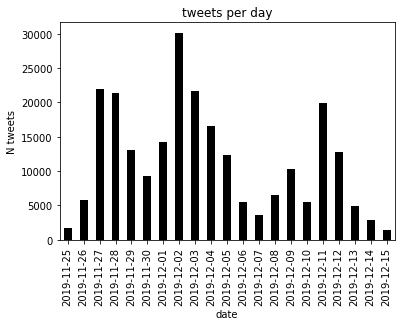

In [50]:
top_days = df['date_only'].value_counts().sort_index(ascending = True)
ax = top_days.plot(kind='bar', color='black', title='tweets per day')
ax.set_xlabel('date')
ax.set_ylabel('N tweets')

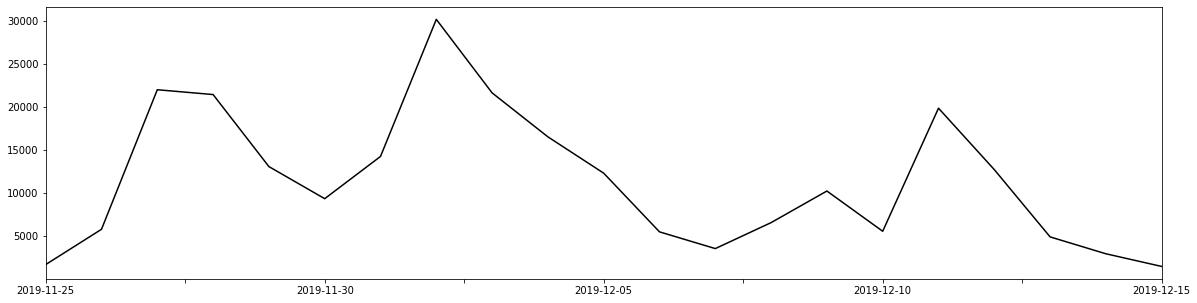

In [51]:
top_days.plot(kind='line', figsize=(20,5), color='black')

In [52]:
top_sources = df['source'].value_counts()

In [53]:
top_sources

Twitter for Android    120773
Twitter Web App        52870 
Twitter for iPhone     50135 
Twitter for iPad       11843 
Twitter Web Client     2001  
                       ...   
Socialbakers           1     
Tumblr                 1     
MyBotanicGarden        1     
FCBTube                1     
Lalaland x             1     
Name: source, Length: 129, dtype: int64

In [54]:
top_sources_perc = round (df['source'].value_counts(normalize = True) * 100, 4)

In [55]:
top_sources_perc

Twitter for Android    50.0095
Twitter Web App        21.8923
Twitter for iPhone     20.7598
Twitter for iPad       4.9039 
Twitter Web Client     0.8286 
                        ...   
Socialbakers           0.0004 
Tumblr                 0.0004 
MyBotanicGarden        0.0004 
FCBTube                0.0004 
Lalaland x             0.0004 
Name: source, Length: 129, dtype: float64

## Cleanup & Pieplot 

In [56]:
top = top_sources_perc.index[0:5]

def remove_others(s_source): 
    if s_source not in top: 
        return 'other'
    else: 
        return s_source
        
df['sources_clean'] = df['source'].apply(remove_others)

In [57]:
df['sources_clean'].value_counts()

Twitter for Android    120773
Twitter Web App        52870 
Twitter for iPhone     50135 
Twitter for iPad       11843 
other                  3878  
Twitter Web Client     2001  
Name: sources_clean, dtype: int64

Text(0, 0.5, '')

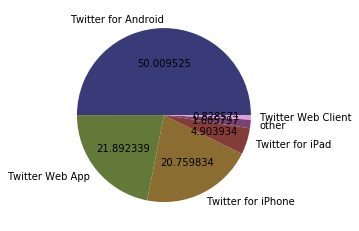

In [58]:
ax = df['sources_clean'].value_counts().plot(kind='pie', autopct='%f', colormap='tab20b')

ax.set_ylabel('')

## Top replies

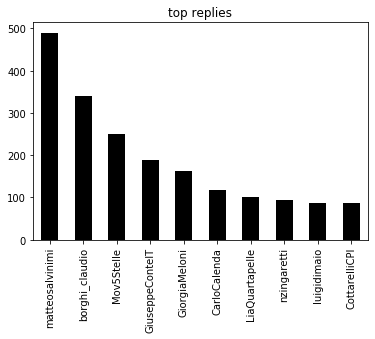

In [59]:
df['reply'].value_counts().head(10).plot(kind='bar', color='black', title='top replies')

## Top mentions

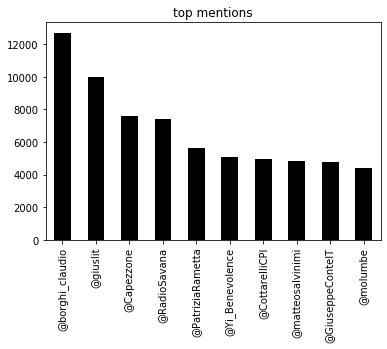

In [60]:
df['full_text'].str.extractall(r'(\@\w+)')[0].value_counts().head(10).plot(kind='bar', color='black', title='top mentions')

In [61]:
df['full_text'].str.extractall(r'(\@\w+)')[0].value_counts()

@borghi_claudio     12714
@giuslit            10014
@Capezzone          7590 
@RadioSavana        7436 
@PatriziaRametta    5628 
                    ...  
@CatoneIlC3nsore    1    
@Luigidimaio        1    
@battleforeurope    1    
@FI_Parlamento      1    
@meko5454           1    
Name: 0, Length: 6297, dtype: int64

## Top hashtags

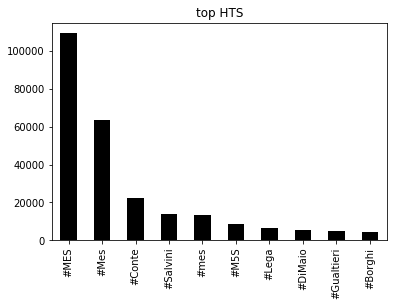

In [62]:
df['full_text'].str.extractall(r'(\#\w+)')[0].value_counts().head(10).plot(kind='bar', color='black', title='top HTS')

In [63]:
df['full_text'].str.extractall(r'(\#\w+)')[0].value_counts()

#MES                  109116
#Mes                  63645 
#Conte                22603 
#Salvini              13759 
#mes                  13489 
                      ...   
#NicolaPorro          1     
#Babbi                1     
#MassimilianoRomeo    1     
#amodeo               1     
#dimuro               1     
Name: 0, Length: 7555, dtype: int64

## Retweet rate

In [36]:
df['is_retweet'] = df['retweeted_status'].apply(lambda x: False if pd.isnull(x) else True)
df_retweeted = df[df['is_retweet']==True]

In [37]:
df_retweeted[['retweeted_status']]

,retweeted_status
0,La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou
1,Giorno 9\n#StopMes NO al #MES\n#StopMes No al #MES \n#StopMes NO al #MES \n#StopMes NO al #MES\n#StopMes NO al #MES \n#StopMes NO al #MES
2,La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou
3,La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou
5,"Piu vado a fondo della riforma del #Mes, piu penso che sia stata pensata per estromettere l'Italia dall'eurozona (o quantomeno darci una scusa per uscire). Sara per questo che se ne parla solo da noi?\n\n#StopMes"
...,...
241495,".Visto che hanno collezionato l'ennesima figura di merda, i #sovranisti di 'sta cippa non parlano piu di #MES? https://t.co/iUg9sC5WDg"
241496,Un altro cambio di casacca? \n#Grassi #Lucidi #Urraro #Mes #DiMaio https://t.co/ifP6FXUjeg
241497,Se ne dicono tante sul #MES ma la cosa piu assurda e che chi adesso critica laccordo era al governo quando laccordo venne finalizzato. Che facevano? Si occupavano del franco CFA? O del signoraggio? O di qualche altra bufala? O semplicemente dormivano?
241498,La#bancapopolareBaristava per saltare in aria nel silenzio del governo:oltre 3000 dipendenti e 300 sportelli coinvolti. Alla banca era stato negato dall'UE l'aiuto del fondo interbancario nel 2014 per salvare banca Tercas: ed ecco i risultati!E adesso ci chiedono pure il#MES?! https://t.co/ZXyuIwa1gk


In [40]:
df.drop_duplicates(subset=['aut_scrname'], keep = 'first')

,author,aut_scrname,tweet_id,retweeted_status,full_text,reply,created_at,retweet_count,favorite_count,hashtags,...,aut_followerscount,aut_verified,aut_created,date_only,sources_clean,is_retweet,retweeted_author,complete_text,prev,p
0,ROBYUS,78_robyus,1198961837112475653,La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,RT @Rinaldi_euro: La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,NaN,2019-11-25 13:49:12,612,0,None,...,350,False,2016-01-19 20:41:37,2019-11-25,Twitter for iPhone,True,Rinaldi_euro,La riforma del Mes e una cagata pazzesca,1,1.000000
1,Antonia Agostini,antoniacri,1198962278047068162,Giorno 9\n#StopMes NO al #MES\n#StopMes No al #MES \n#StopMes NO al #MES \n#StopMes NO al #MES\n#StopMes NO al #MES \n#StopMes NO al #MES,RT @Nadezhda24Kr: Giorno 9\n#StopMes NO al #MES\n#StopMes No al #MES \n#StopMes NO al #MES \n#StopMes NO al #MES\n#StopMes NO al #MES \n#Stop,NaN,2019-11-25 13:50:57,1,0,None,...,19,False,2010-02-15 00:26:54,2019-11-25,Twitter for Android,True,Nadezhda24Kr,Giorno 9 StopMes NO al MES StopMes No al MES StopMes NO al MES StopMes NO al MES StopMes NO al MES StopMes NO al MES,1,0.976877
2,redbaron,whiteowl48,1198962804637782017,La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,RT @Rinaldi_euro: La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,NaN,2019-11-25 13:53:02,612,0,None,...,218,False,2012-04-12 10:01:52,2019-11-25,Twitter for Android,True,Rinaldi_euro,La riforma del Mes e una cagata pazzesca,1,1.000000
3,silvana chiodi,silvana_chiodi,1198962840041861120,La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,RT @Rinaldi_euro: La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,NaN,2019-11-25 13:53:11,612,0,None,...,7,False,2013-03-01 21:13:53,2019-11-25,Twitter for iPhone,True,Rinaldi_euro,La riforma del Mes e una cagata pazzesca,1,1.000000
4,Vulcanhelios,Vulcanelios,1198963711425335297,NaN,Limmagine:\nle pecore al macello cantando Bella Ciao.\n#MES,NaN,2019-11-25 13:56:39,1,3,None,...,3029,False,2014-04-17 21:28:46,2019-11-25,Twitter for iPhone,False,NaN,Limmagine le pecore al macello cantando Bella Ciao MES,2,0.951083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241458,Matteo Corrocher,CorrocherMatteo,1206344347345702917,"Quando un cialtrone sovranista dice che il #MES serve per salvare Deutsche Bank con i soldi italiani, ricordagli questa lista di banche nostrane e chiedigli quanto quota il CDS di DB rispetto alla piu grande banca italiana. Se ti risponde Bacioni, hai trovato il Capitano. https://t.co/zGoQRr4s6w","RT @carloalberto: Quando un cialtrone sovranista dice che il #MES serve per salvare Deutsche Bank con i soldi italiani, ricordagli questa",NaN,2019-12-15 22:44:39,172,0,None,...,50,False,2019-09-14 13:09:13,2019-12-15,Twitter for Android,True,carloalberto,Quando un cialtrone sovranista dice che il MES serve per salvare Deutsche Bank con i soldi italiani ricordagli questa lista di banche nostrane e chiedigli quanto quota il CDS di DB rispetto alla piu grande banca italiana Se ti risponde Bacioni hai trovato il Capitano,3,1.000000
241471,Giancarlo Poli,GiancarloPoli7,1206350546069794816,La#bancapopolareBaristava per saltare in aria nel silenzio del governo:oltre 3000 dipendenti e 300 sportelli coinvolti. Alla banca era stato negato dall'UE l'aiuto del fondo interbancario nel 2014 per salvare banca Tercas: ed ecco i risultati!E adesso ci chiedono pure il#MES?! https://t.co/ZXyuIwa1gk,RT @EmanueleSavass1: La#bancapopolareBaristava per saltare in aria nel silenzio del governo:oltre 3000 dipendenti e 300 sportelli coinvol,NaN,2019-12-15 23:09:17,53,0,None,...,522,False,2016-01-11 18:11:55,2019-12-15,Twitter for Android,True,EmanueleSavass1,La bancapopolareBaristava per saltare in aria nel silenzio 

In [66]:
df_retweeted['retweeted_status'].value_counts().head(10)

Se ne dicono tante sul #MES ma la cosa piu assurda e che chi adesso critica laccordo era al governo quando laccordo venne finalizzato. Che facevano? Si occupavano del franco CFA? O del signoraggio? O di qualche altra bufala? O semplicemente dormivano?                                                        1868
Tutto quanto detto da Gualtieri e gravissimo e evidenzia comportamenti che potrebbero anche configurare eversione\nConte ha nei fatti approvato un testo definitivo e inemendabile senza alcun dibattito in parlamento.\nChe il presidente si cerchi un avvocato.\n#AudizioneGualtieri #MES                        1811
Oggi a Mori, in Trentino, ho incrociato un banchetto della Lega che raccoglieva le firme contro il #MES. Ne ho approfittato per porre loro qualche domanda...  https://t.co/2GpW3ZuogK                                                                                                                             1476
Non ho parole, e gia sparito anche il "pacchetto", perche il MES

In [67]:
pivot_rts = pd.pivot_table(df, index = 'date_only', columns = ['is_retweet'], values=['key'], aggfunc = len)

In [68]:
pivot_rts

key       
is_retweet False   True
date_only              
2019-11-25  187   1494 
2019-11-26  615   5168 
2019-11-27  1697  20310
2019-11-28  2090  19357
2019-11-29  1532  11541
2019-11-30  1022  8319 
2019-12-01  1420  12831
2019-12-02  3632  26558
2019-12-03  2762  18880
2019-12-04  2182  14348
2019-12-05  1686  10621
2019-12-06  874   4611 
2019-12-07  528   3011 
2019-12-08  897   5661 
2019-12-09  1121  9111 
2019-12-10  636   4918 
2019-12-11  2512  17350
2019-12-12  1290  11430
2019-12-13  556   4343 
2019-12-14  281   2655 
2019-12-15  202   1261

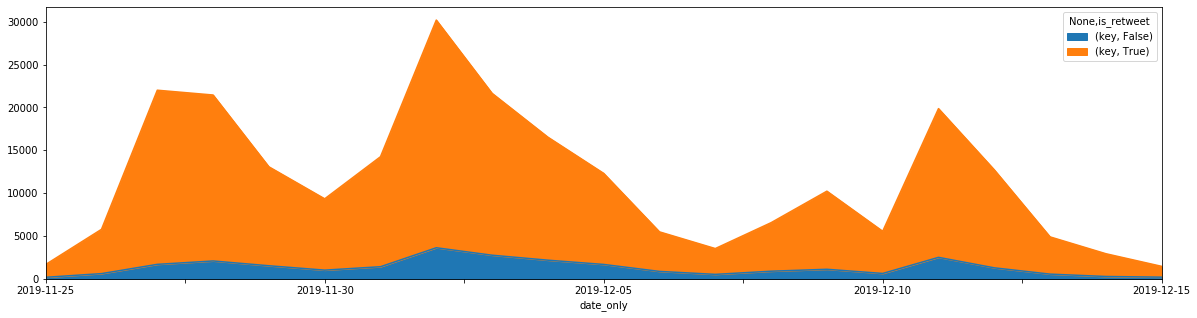

In [69]:
pivot_rts.plot(kind='area', figsize=(20,5))

Text(0, 0.5, 'N tweets and retweets')

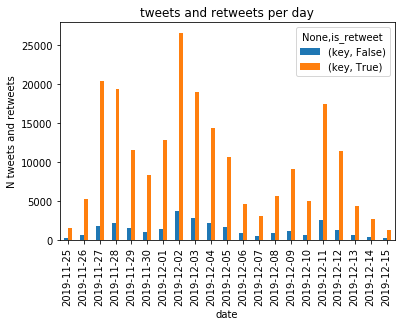

In [70]:
ax = pivot_rts.plot(kind='bar', title = "tweets and retweets per day")
ax.set_xlabel('date')
ax.set_ylabel('N tweets and retweets')

## Prev

In [71]:
df['prev'].value_counts()

1    176532
2    42818 
3    22150 
Name: prev, dtype: int64

In [72]:
ds['cat'].value_counts()

1    1764
2    645 
3    454 
Name: cat, dtype: int64

Text(0, 0.5, '')

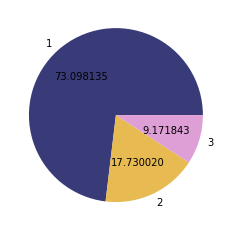

In [73]:
ax = df['prev'].value_counts().plot(kind='pie', autopct='%f', colormap='tab20b')

ax.set_ylabel('')

Text(0, 0.5, '')

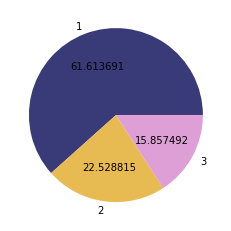

In [74]:
ax = ds['cat'].value_counts().plot(kind='pie', autopct='%f', colormap='tab20b')

ax.set_ylabel('')

## Prev Rate

In [75]:
pivot_rts2 = pd.pivot_table(df, index = 'date_only', columns = ['prev'], values=['key'], aggfunc = len)

In [76]:
pivot_rts2

key            
prev            1     2     3
date_only                    
2019-11-25  1514   110   57  
2019-11-26  5179   399   205 
2019-11-27  19962  1969  76  
2019-11-28  18102  2606  739 
2019-11-29  9017   1699  2357
2019-11-30  6801   1011  1529
2019-12-01  11166  1943  1142
2019-12-02  21457  7151  1582
2019-12-03  13920  5493  2229
2019-12-04  10826  4306  1398
2019-12-05  8425   2273  1609
2019-12-06  3855   964   666 
2019-12-07  2710   426   403 
2019-12-08  3134   1187  2237
2019-12-09  5382   1741  3109
2019-12-10  3452   1211  891 
2019-12-11  16197  2907  758 
2019-12-12  9820   2190  710 
2019-12-13  3012   1800  87  
2019-12-14  1873   890   173 
2019-12-15  728    542   193

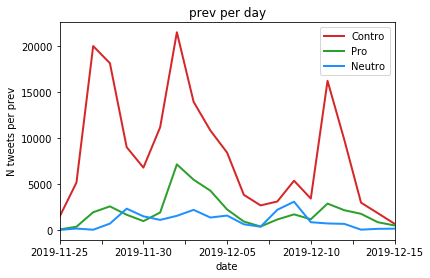

In [95]:
labels = ('Contro', 'Pro','Neutro')
ax = pivot_rts2.plot(kind='line', title = "prev per day", color=('tab:red', 'tab:green', 'dodgerblue'),linewidth=2.0)
ax.set_xlabel('date')
ax.set_ylabel('N tweets per prev')
ax.legend(['Contro','Pro','Neutro'])

## Cat Rate

In [78]:
pivot_rts3 = pd.pivot_table(ds, index = 'date_only', columns = ['cat'], values=['key'], aggfunc = len)

In [79]:
pivot_rts3

key        
cat           1   2   3
date_only              
2019-11-25  109  14  6 
2019-11-26  104  11  21
2019-11-27  118  16  5 
2019-11-28  106  20  13
2019-11-29  84   22  32
2019-11-30  84   19  34
2019-12-01  85   23  30
2019-12-02  94   29  16
2019-12-03  73   47  19
2019-12-04  60   58  20
2019-12-05  76   31  31
2019-12-06  80   37  19
2019-12-07  99   18  17
2019-12-08  53   21  63
2019-12-09  62   25  51
2019-12-10  72   33  31
2019-12-11  104  26  8 
2019-12-12  100  28  10
2019-12-13  69   65  2 
2019-12-14  79   41  13
2019-12-15  53   61  13

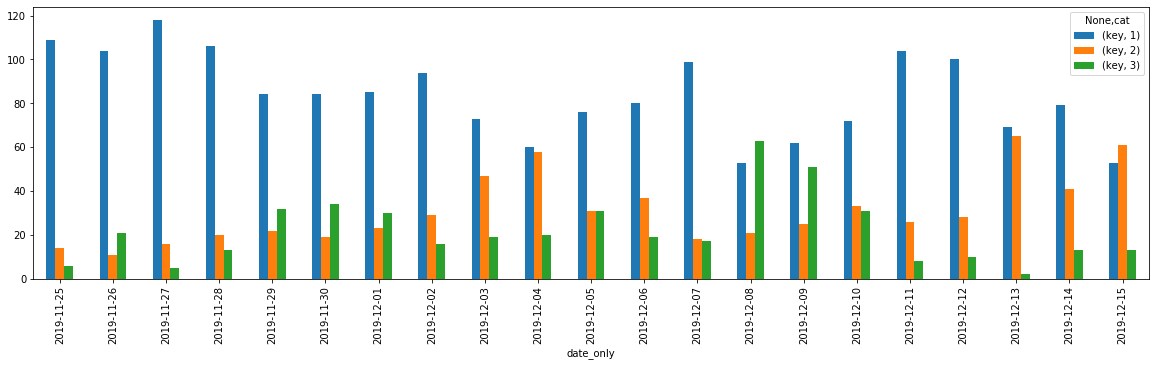

In [80]:
pivot_rts3.plot(kind='bar', figsize=(20,5))

Text(0, 0.5, 'N tweets per prev')

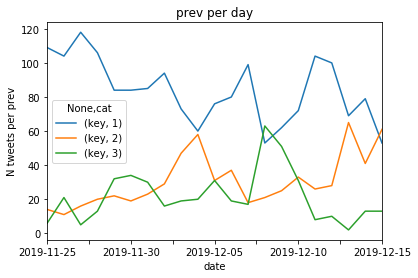

In [81]:
ax = pivot_rts3.plot(kind='line', title = "prev per day")
ax.set_xlabel('date')
ax.set_ylabel('N tweets per prev')

## Authors network

In [82]:
ft_rt = df[df['full_text'].str.startswith('RT')]
ft_rt['retweeted_author'] = ft_rt['full_text'].str.extract('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)')
ft2 = pd.DataFrame()
ft2[['source','target']] = ft_rt[['aut_scrname','retweeted_author']]
#ft2[['source','target']].to_csv('authors_network.csv')


C:\Users\pippo\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
df['retweeted_author'] = ft_rt['retweeted_author']

In [84]:
ft2

,source,target
0,78_robyus,Rinaldi_euro
1,antoniacri,Nadezhda24Kr
2,whiteowl48,Rinaldi_euro
3,silvana_chiodi,Rinaldi_euro
5,AvvocatoLorenti,AntonioGrzt
...,...,...
241495,tittilatitti,Sabina1956
241496,MarceVann,lefrasidiosho
241497,elMago_Silvano,CottarelliCPI
241498,WillyCoyote6,EmanueleSavass1


In [85]:
ft2['target'].value_counts()

giuslit            9766
RadioSavana        7361
Capezzone          7223
borghi_claudio     7133
PatriziaRametta    5455
                   ... 
Abocconetti        1   
cuartero_daniel    1   
S_T_04_09          1   
FognaniM           1   
PiuEuropa4_0       1   
Name: target, Length: 3114, dtype: int64

In [86]:
ft2['source'].value_counts()

Federicobarald3    750
SoniaLaVera        731
ALisimberti        649
Alessia60216960    557
thewaterflea       528
                  ... 
salvatorepirino    1  
susannafornera     1  
Fra_Cusenza        1  
jonimac71          1  
Ennio48237278      1  
Name: source, Length: 26154, dtype: int64